# Homework#1

## 2014002906 KIM, JUNSU

## 기본함수 정의

In [1]:
import numpy as np
import math  
import matplotlib.pyplot as plt

In [2]:
def true_f(x):
    return np.sin(x) #true function

In [3]:
def gen_pi_data(x, degree,X_train_set):
    X=np.zeros((x.shape[0],degree+1))
    for d in range (degree+1):
         X[ :, d] = x ** d
    X_train_set.append(X)

In [4]:
def fit_poly(X,y,w_array,y_array):
    Y = y.reshape(-1,1)
    A = np.matmul(X.transpose(), X)
    B = np.matmul(X.transpose(), Y)
    weight = np.linalg.solve(A,B)
    y_pred = X @ weight
    
    w_array.append(weight)
    y_array.append(y_pred)

## Synthetic data generation

In [5]:
num_sample = 21 

x_train = np.linspace(-math.pi, math.pi, num_sample) # Xdata Generation.
#true_f(x) = np.sin(x) # True Function 
y_train = true_f(x_train) + np.random.normal(loc= 0, scale= 0.5, size= num_sample) #  Y data with some noise.

x_val = np. linspace(-math.pi, math.pi, num_sample//2) # Validation data set 1/3 of Whole Data set.
y_val = true_f(x_val) + np.random.normal(loc= 0, scale= 0.5, size= num_sample//2)



## Polynomial Regression
    

Text(0.5, 1.0, 'Degree=7')

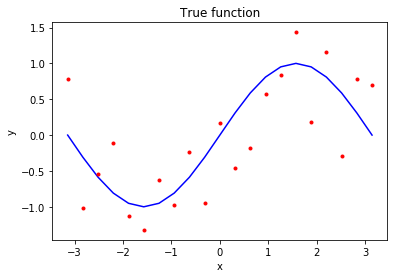

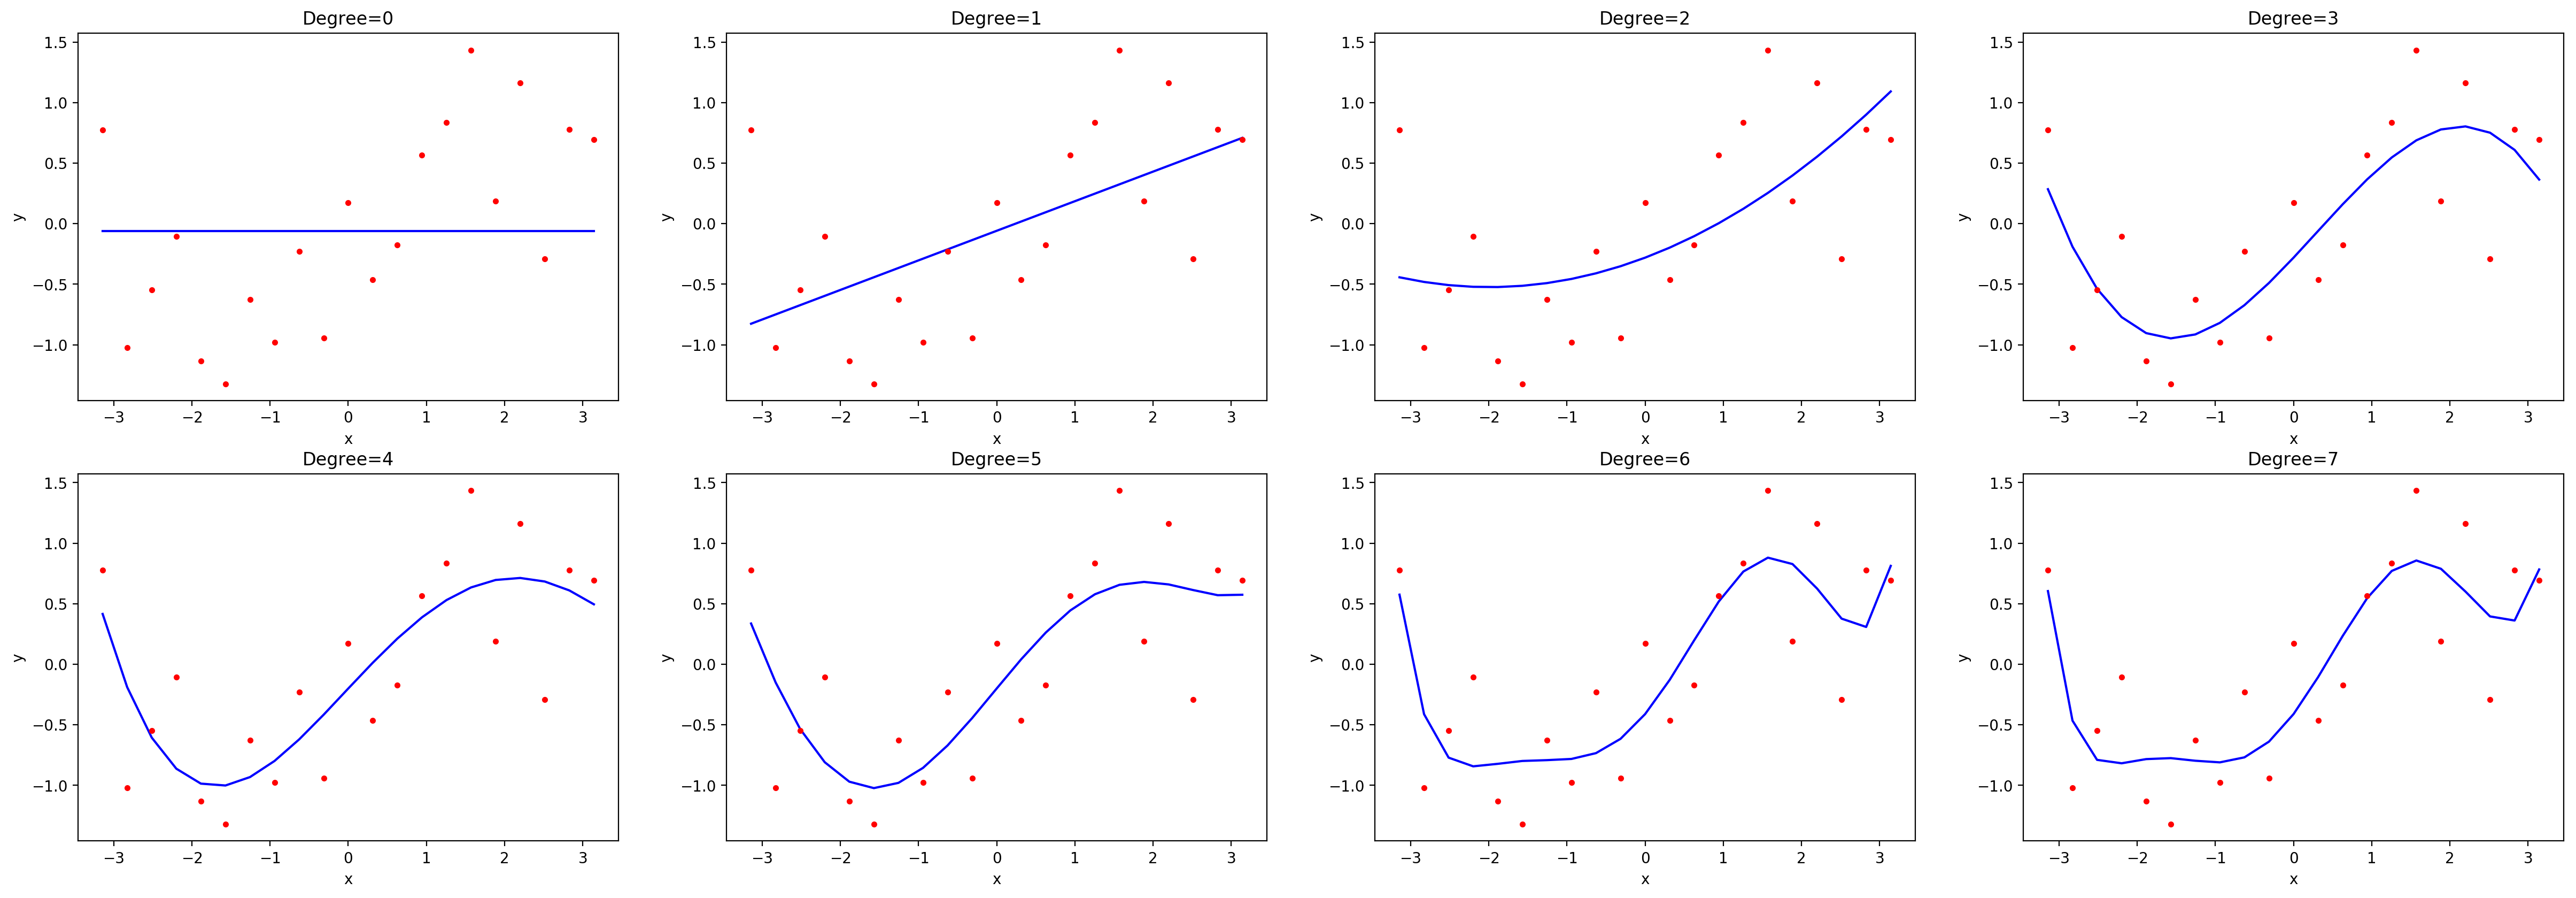

In [6]:
X_train=[]; # pi data set
Weight=[]; # arrange of weight
Y_pred=[]; # prediction of y data set
X_val=[]; # pi data of validation data set
Y_val=[]; # prediction of validation x data set
degree=7

for d1 in range (degree+1):
    gen_pi_data(x_train, d1, X_train) 
    fit_poly(X_train[d1], y_train, Weight, Y_pred)
    
for d2 in range (degree+1):
    gen_pi_data(x_val, d2, X_val)
    
for d3 in range (degree+1):
    Y_val.append(np.matmul(X_val[d3], Weight[d3]))


# 그래프 그리는 식
plt.plot(x_train, true_f(x_train), 'b-')
plt.plot(x_train, y_train, 'r.')
plt.title('True function')
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')

f, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10), dpi=200)

for i in range(0,2):
    for j in range(0,4):
        axes[i,j].plot(x_train, Y_pred[(4*i)+j], 'b-')
        axes[i,j].plot(x_train, y_train, 'r.')
        axes[i,j].set_xlabel('x')
        axes[i,j].set_ylabel('y')

axes[0,0].set_title('Degree=0')
axes[0,1].set_title('Degree=1')
axes[0,2].set_title('Degree=2')
axes[0,3].set_title('Degree=3')
axes[1,0].set_title('Degree=4')
axes[1,1].set_title('Degree=5')
axes[1,2].set_title('Degree=6')
axes[1,3].set_title('Degree=7')



# MSE 측정

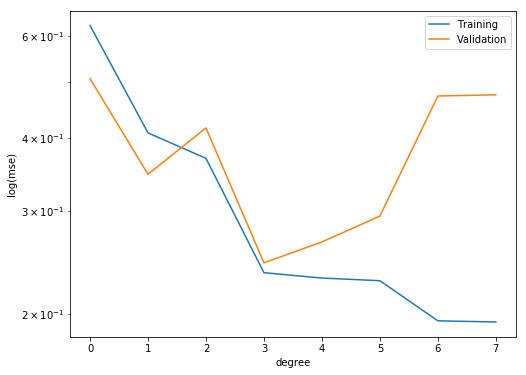

In [7]:
MSE_train=[]; #degree에 따른 training set MSE
MSE_val=[]; #degree에 따른 validation set MSE

for i in range(degree+1):
    MSE_train.append(np.mean((y_train - Y_pred[i].reshape(-1)) **2))
    MSE_val.append(np.mean((y_val - Y_val[i].reshape(-1)) **2))



#그래프 그리는 식
plt.figure(figsize=(8,6))
plt.plot(range(0,8), MSE_train, label = 'Training')
plt.plot(range(0,8), MSE_val, label = 'Validation')
ax=plt.gca()
ax.set_yscale('log')
ax.set_xlabel('degree')
ax.set_ylabel('log(mse)')

plt.legend()